# How to read and visualize the diffusivities

In [1]:
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
import h5py

In [2]:
Argo_diff = loadmat('./Argo/Kcc_Argo_2018.mat')

In [3]:
filepath = './surface_dirfter/Kcc_relative_disp_1x1deg_100km_Drifter_v3.mat'
GDP_diff = {}
f = h5py.File(filepath)
for k, v in f.items():
    GDP_diff[k] = np.array(v)
    
# GDP was saved in v7.3, which can't be read using scipy

In [4]:
Argo_diff.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Kcc', 'errKcc', 'mask', 'num_pairs', 'sumdXYsq', 'x', 'y'])

In [5]:
GDP_diff.keys()

dict_keys(['Kac', 'Kcc', 'errKac', 'errKcc', 'lat_bins', 'lon_bins', 'num_pairs', 'num_pairs_t', 'sumdXYsq', 't_in'])

# Description of variables

Argo_diff 
- Kcc: Cross stream diffusivity at lon, lat and time. Where time increments in 10 day steps. In the paper the average was taken over the last 100 days, when diffusivity has equilibrated.
- x : lon
- y : lat
- errKcc : error 
- mask : land mask
- num_pairs : number of pairs
- sumdXYsq : metric for particle displacement

GDP_diff 
- Kcc: Cross stream diffusivity at lon, lat and time. Where time increments in 10 day steps. In the paper the average was taken over the last 100 days, when diffusivity has equilibrated.
- lon_bins : lon
- lat_bins : lat
- errKcc : error 
- num_pairs : number of pairs
- sumdXYsq : metric for particle displacement
- t_in : time axis

##### Things to fix: 
The GDP and Argo files should have consistent variables. Right now the Argo file is missing variables, that are in GDP. The variable names should mean the same thing in both. Also the variable shapes and orientations should be the same. Basically, the same plotting scripts should be able to read both data files. There are a lot of time steps in surface drifters, which might not be necessary. Make sure the time mean chosen for plotting below is the same as that in the paper.

In [6]:
params = {
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

Text(0, 0.5, 'Lat')

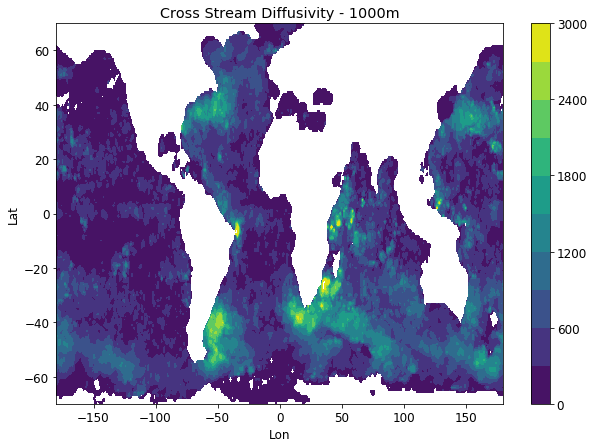

In [7]:
plt.figure(figsize=(10,7))
plt.contourf(Argo_diff['x'][0,:], Argo_diff['y'][0,:], 
               Argo_diff['Kcc'][:,:,11:21].mean(axis=2).T, levels=np.linspace(0,3000,11))
plt.colorbar()
plt.title('Cross Stream Diffusivity - 1000m')
plt.xlabel('Lon')
plt.ylabel('Lat')

Text(0, 0.5, 'Lat')

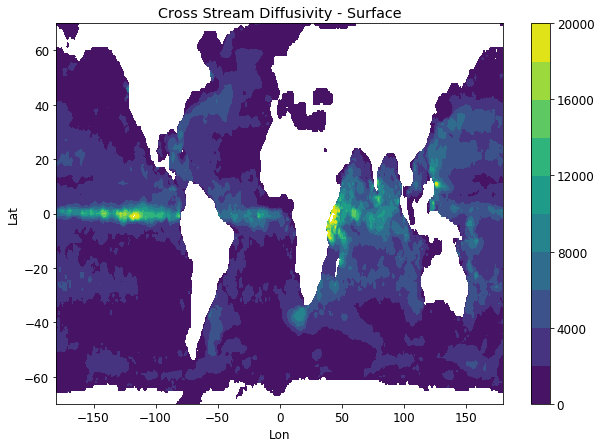

In [8]:
plt.figure(figsize=(10,7))
plt.contourf(GDP_diff['lon_bins'][:,0], GDP_diff['lat_bins'][:,0], 
               GDP_diff['Kcc'][7:11,:,:].mean(axis=0), levels=np.linspace(0,20000,11))
plt.colorbar()
plt.title('Cross Stream Diffusivity - Surface')
plt.xlabel('Lon')
plt.ylabel('Lat')